#Introduction to Keras




In [1]:
!pip install tensorflow keras


In [2]:
import tensorflow as tf
print (tf.keras.__version__)

3.8.0


In [3]:
import numpy as np
# Simple function f(x) = x^2
def f(x):
 return x ** 2
# Manual derivative (f’(x) = 2x)
def gradient(x):
 return 2 * x
# Update rule: x = x - learning_rate * gradient
x = 5.0
learning_rate = 0.1
for _ in range(10): # Manually optimize for 10 steps
 x -= learning_rate * gradient(x)
print(f"x: {x}, f(x): {f(x)}")

x: 0.5368709120000001, f(x): 0.2882303761517119


In [4]:
import tensorflow as tf
x = tf.Variable(5.0) # Trainable variable
with tf.GradientTape() as tape:
 y = x ** 2 # y = x^2
grad = tape.gradient(y, x) # Computes dy/dx automatically
print(grad.numpy()) # Output: 10.0

10.0


#Matrix Multiplication Speed (Numpy vs. Tensorflow on GPU).

In [5]:
import numpy as np
import tensorflow as tf
import time
# Create large random matrices
size = (1000, 1000)
A = np.random.rand(*size)
B = np.random.rand(*size)
# NumPy Multiplication
start = time.time()
C_numpy = np.dot(A, B)
print("NumPy Time:", time.time() - start)
# TensorFlow Multiplication (for colab uses GPU Runtime if available)
A_tf = tf.constant(A)
B_tf = tf.constant(B)
start = time.time()
C_tf = tf.matmul(A_tf, B_tf)
print("TensorFlow Time:", time.time() - start)

NumPy Time: 0.07778239250183105
TensorFlow Time: 0.1590113639831543


#Load and Preprocess the Data:

In [6]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [9]:
!gdown 1PbxpG74Qswfx1rhGQXFCVCaj_v05W2ZJ

Downloading...
From (original): https://drive.google.com/uc?id=1PbxpG74Qswfx1rhGQXFCVCaj_v05W2ZJ
From (redirected): https://drive.google.com/uc?id=1PbxpG74Qswfx1rhGQXFCVCaj_v05W2ZJ&confirm=t&uuid=ccb15053-f847-4202-82d9-e6481c45adac
To: /content/Copy of Copy of devnagari digit.zip
100% 16.6M/16.6M [00:00<00:00, 55.2MB/s]


In [10]:
!unzip "/content/Copy of Copy of devnagari digit.zip" -d /content/dataset

Streaming output truncated to the last 5000 lines.
  inflating: /content/dataset/DevanagariHandwrittenDigitDataset/Train/digit_7/10299.png  
  inflating: /content/dataset/DevanagariHandwrittenDigitDataset/Train/digit_7/10300.png  
  inflating: /content/dataset/DevanagariHandwrittenDigitDataset/Train/digit_7/10301.png  
  inflating: /content/dataset/DevanagariHandwrittenDigitDataset/Train/digit_7/10302.png  
  inflating: /content/dataset/DevanagariHandwrittenDigitDataset/Train/digit_7/10303.png  
  inflating: /content/dataset/DevanagariHandwrittenDigitDataset/Train/digit_7/10304.png  
  inflating: /content/dataset/DevanagariHandwrittenDigitDataset/Train/digit_7/10306.png  
  inflating: /content/dataset/DevanagariHandwrittenDigitDataset/Train/digit_7/10307.png  
  inflating: /content/dataset/DevanagariHandwrittenDigitDataset/Train/digit_7/104017.png  
  inflating: /content/dataset/DevanagariHandwrittenDigitDataset/Train/digit_7/104018.png  
  inflating: /content/dataset/DevanagariHandwri

Training set: (17000, 28, 28, 1), Labels: (17000, 10)
Testing set: (3000, 28, 28, 1), Labels: (3000, 10)


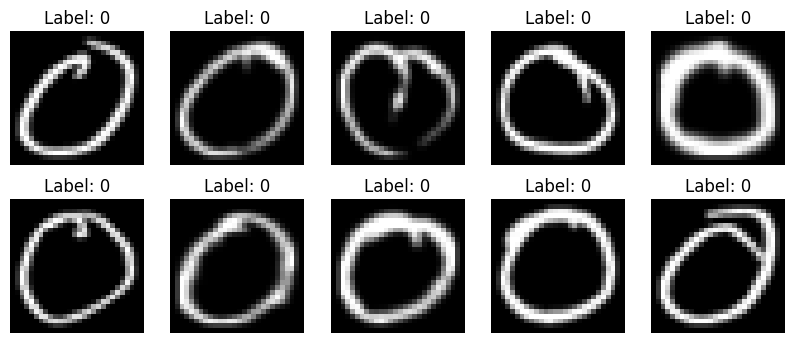

In [11]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from PIL import Image  # Import Pillow

# Define dataset paths
train_dir = "/content/dataset/DevanagariHandwrittenDigitDataset/Train/"
test_dir = "/content/dataset/DevanagariHandwrittenDigitDataset/Test/"

# Define image size
img_height, img_width = 28, 28

# Function to load images and labels using PIL
def load_images_from_folder(folder):
    images = []
    labels = []
    class_names = sorted(os.listdir(folder))  # Sorted class names (digit_0, digit_1, ...)
    class_map = {name: i for i, name in enumerate(class_names)}  # Map class names to labels
    for class_name in class_names:
        class_path = os.path.join(folder, class_name)
        label = class_map[class_name]
        for filename in os.listdir(class_path):
            img_path = os.path.join(class_path, filename)
            # Load image using PIL
            img = Image.open(img_path).convert("L")  # Convert to grayscale
            img = img.resize((img_width, img_height))  # Resize to (28,28)
            img = np.array(img) / 255.0  # Normalize pixel values to [0,1]
            images.append(img)
            labels.append(label)
    return np.array(images), np.array(labels)

# Load training and testing datasets
x_train, y_train = load_images_from_folder(train_dir)
x_test, y_test = load_images_from_folder(test_dir)

# Reshape images for Keras input
x_train = x_train.reshape(-1, img_height, img_width, 1)  # Shape (num_samples, 28, 28, 1)
x_test = x_test.reshape(-1, img_height, img_width, 1)

# One-hot encode labels
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

# Print dataset shape
print(f"Training set: {x_train.shape}, Labels: {y_train.shape}")
print(f"Testing set: {x_test.shape}, Labels: {y_test.shape}")

# Visualize some images
plt.figure(figsize=(10, 4))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(x_train[i].reshape(28, 28), cmap='gray')
    plt.title(f"Label: {np.argmax(y_train[i])}")
    plt.axis("off")
plt.show()


#Build the FCN Model(Model Architecture)


In [12]:
# Model parameters
import tensorflow as tf
from tensorflow import keras
num_classes = 10
input_shape = (28, 28, 1)
model = keras.Sequential(
[
keras.layers.Input(shape=input_shape),
keras.layers.Flatten(), # Flatten the 28x28 image to a 784-dimensional vector
keras.layers.Dense(64, activation="sigmoid"),
keras.layers.Dense(128, activation="sigmoid"),
keras.layers.Dense(256, activation="sigmoid"),
keras.layers.Dense(num_classes, activation="softmax"),
]
)

In [13]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │        50,240 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 256)            │        33,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 94,154 (367.79 KB)

 Trainable params: 94,154 (367.79 KB)

 Non-trainable params: 0 (0.00 B)

#Model Compilation



In [14]:
# Compile the model
model.compile(optimizer='adam',  # Adam optimizer
              loss='categorical_crossentropy',  # Loss function for multi-class classification
              metrics=['accuracy'])  # Evaluation metric


#Model Training

In [21]:
batch_size = 128
epochs = 20
# Callbacks
callbacks = [
  keras.callbacks.ModelCheckpoint(filepath="model_at_epoch_{epoch}.keras"),
  keras.callbacks.EarlyStopping(monitor="val_loss", patience=4 ),
]
# Train the model with callbacks and validation split
history = model.fit(
    x_train,
    y_train,
    batch_size=batch_size,
    epochs=epochs,
    validation_split=0.2,
    callbacks=callbacks,
)


Epoch 1/20
107/107 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.9974 - loss: 0.0154 - val_accuracy: 0.0000e+00 - val_loss: 12.3158
Epoch 2/20
107/107 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.9981 - loss: 0.0123 - val_accuracy: 0.0000e+00 - val_loss: 12.4802
Epoch 3/20
107/107 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.9983 - loss: 0.0117 - val_accuracy: 0.0000e+00 - val_loss: 12.7006
Epoch 4/20
107/107 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.9991 - loss: 0.0091 - val_accuracy: 0.0000e+00 - val_loss: 12.8927
Epoch 5/20
107/107 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.9995 - loss: 0.0074 - val_accuracy: 0.0000e+00 - val_loss: 12.8586


#Model Visualization

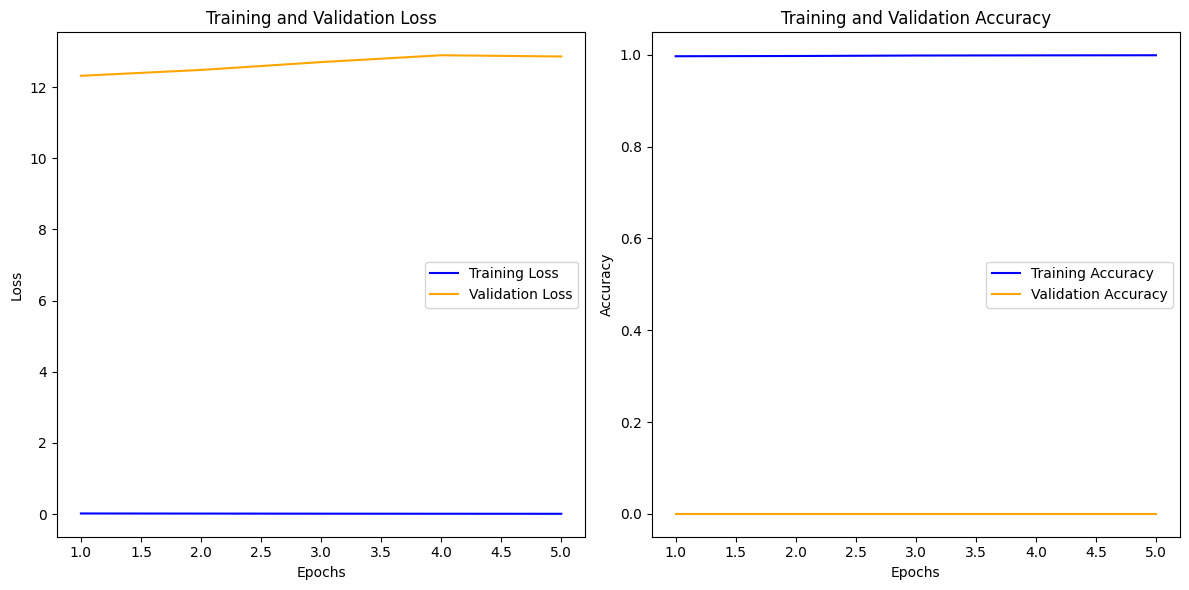

In [22]:
import matplotlib.pyplot as plt

# Assuming 'history' is the object returned by model.fit()

# Extracting training and validation loss
train_loss = history.history['loss']
val_loss = history.history['val_loss']

# Extracting training and validation accuracy (if metrics were specified)
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

# Plotting training and validation loss
plt.figure(figsize=(12, 6))

# Plot loss
plt.subplot(1, 2, 1)
plt.plot(range(1, len(train_loss) + 1), train_loss, label='Training Loss', color='blue')
plt.plot(range(1, len(val_loss) + 1), val_loss, label='Validation Loss', color='orange')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()

# Plot accuracy
plt.subplot(1, 2, 2)
plt.plot(range(1, len(train_acc) + 1), train_acc, label='Training Accuracy', color='blue')
plt.plot(range(1, len(val_acc) + 1), val_acc, label='Validation Accuracy', color='orange')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

# Adjust layout for better spacing
plt.tight_layout()

# Show the plot
plt.show()


# Model Evaluation

In [23]:
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print(f"Test accuracy: {test_acc:.4f}")

94/94 - 0s - 3ms/step - accuracy: 0.7843 - loss: 2.6370
Test accuracy: 0.7843


# Load and Save Model

In [24]:
# Save the trained model to an .h5 file
model.save('/content/drive/MyDrive/AI and ML Workshop/Week-4/DevanagariHandwrittenDigitDataset/Devnagari_model_2358158.h5')

print("Model saved to devnagari_digit_model.h5")


Model saved to devnagari_digit_model.h5


In [25]:
# Load the saved model
loaded_model = tf.keras.models.load_model('/content/drive/MyDrive/AI and ML Workshop/Week-4/DevanagariHandwrittenDigitDataset/Devnagari_model_2358158.h5')

# Evaluate the loaded model on the test set
test_loss, test_accuracy = loaded_model.evaluate(x_test, y_test, verbose=1)

# Print the results
print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")

94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9594 - loss: 0.3907
Test Loss: 2.6370
Test Accuracy: 0.7843


#Predictions


In [26]:
# Predict on test data
predictions = model.predict(x_test)
# Convert predictions from probabilities to digit labels
predicted_labels = np.argmax(predictions, axis=1)
# Check the first prediction
print(f"Predicted label for first image: {predicted_labels[0]}")
print(f"True label for first image: {np.argmax(y_test[0])}")

94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Predicted label for first image: 0
True label for first image: 0


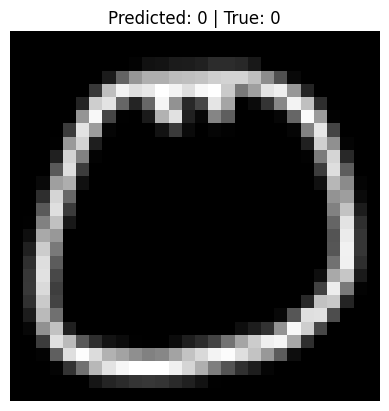

In [27]:
import matplotlib.pyplot as plt

# Visualize the first image and its prediction
plt.imshow(x_test[0].reshape(28, 28), cmap='gray')
plt.title(f"Predicted: {predicted_labels[0]} | True: {np.argmax(y_test[0])}")
plt.axis("off")
plt.show()
